### This notebook aims at testing bbc. 

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy,os,glob
import pylab as pl
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

#### The lines I added in trcsms_my_trc.F90


```python

        DO jj = 1, jpj
             DO ji = 1, jpi
                ibot   = mbkt(ji,jj)       ! bottom level of t-point
                ibotm1 = mbkt(ji,jj) -1    ! Just above last level      

               ! Bottom level no flux condition for diss. elements:
                trn(ji,jj,ibot,jpmyt1)=tmask(ji,jj,ibot)*trn(ji,jj,ibotm1,jpmyt1)!ibot/ibotm1
                trn(ji,jj,ibot,jpmyt2)=tmask(ji,jj,ibot)*trn(ji,jj,ibotm1,jpmyt2)

             END DO
        END DO


        DO jj = 1, jpj
             DO ji = 1, jpi
                ibot   = mbkt(ji,jj) +0      
                ibotm1 = mbkt(ji,jj) -1             
                ibotm2 = mbkt(ji,jj) -2     !the 2nd layer above last level

                ! Bottom level  Neumman condition for part. elements:

                trn(ji,jj,ibot,jpmyt3)=trn(ji,jj,ibotm1,jpmyt3)+&
                                       (trn(ji,jj,ibotm1,jpmyt3)-trn(ji,jj,ibotm2,jpmyt3))&
                                       *fse3t(ji,jj,ibotm2)/fse3t(ji,jj,ibotm1)


                trn(ji,jj,ibot,jpmyt4)=trn(ji,jj,ibotm1,jpmyt4)+&
                                       (trn(ji,jj,ibotm1,jpmyt4)-trn(ji,jj,ibotm2,jpmyt4))&
                                       *fse3t(ji,jj,ibotm2)/fse3t(ji,jj,ibotm1)
             END DO
        END DO


```

* Figures belows tested these lines.

In [77]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/Tochum/EXP00/*_ptrc_T*.nc'));
print("found *.nc file: \n{}".format(nc_filename));

bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry']

import matplotlib.cm as cm
def vetical(data,dep,string,ylim='False',yup=-1000,ydown=500):
    a=[[],[],[700],[190]]#a=np.where(data==data.max())
    
    for i in range (len(data[:,1,1,1])):
        cc=cm.Spectral(i*50)
        plt.plot(data[-i,:,a[2][0],a[3][0]],dep,color=cc,linewidth=1,label='T:%s'%i)
        plt.legend(loc=2)

    for k in range (len(dep)):
        plt.axhline(dep[k],c="grey",linestyle='--',linewidth=0.5,alpha=0.5)
    plt.axhline(bathy[a[2][0],a[3][0]],c="grey",linewidth=5,alpha=0.7)
    plt.ylabel('depth (m)')
    plt.xlabel('%s Conc.'%string)
    
    if ylim=='True':
        dmin=bathy[a[2][0],a[3][0]]+yup
        dmax=bathy[a[2][0],a[3][0]]+ydown
    plt.ylim([dmin,dmax])
              
    #print ('deepest:%s m'%bathy[a[2][0],a[3][0]])

found *.nc file: 
['/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/Tochum/EXP00/en_1h_20020101_20020101_ptrc_T.nc']


#### plot vertical profiles for tracers at point [700,190]

found *.nc file: 
en_1h_20020101_20020101_ptrc_T.nc


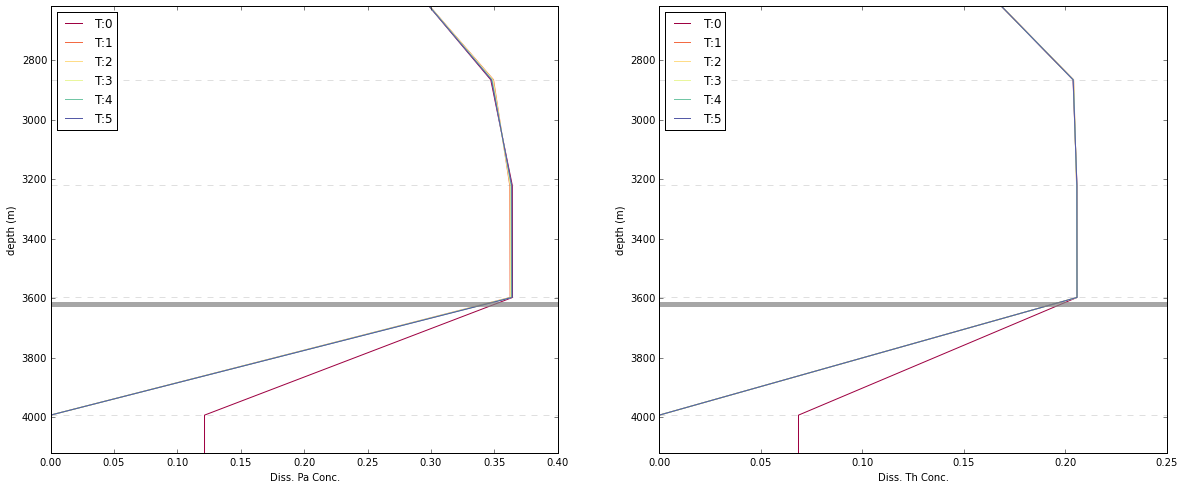

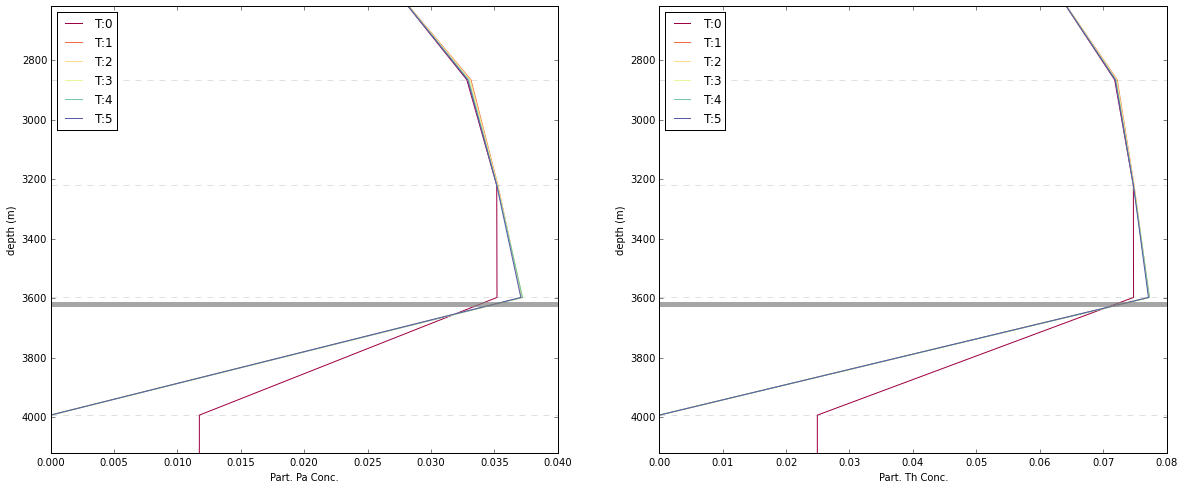

In [74]:
ptrc=nc.Dataset(nc_filename[0])
print("found *.nc file: \n{}".format(nc_filename[0]))
TR_7=ptrc.variables['TR_7'][:,:,:,:];TR_8=ptrc.variables['TR_8'][:,:,:,:]
TR_9=ptrc.variables['TR_9'][:,:,:,:];TR_10=ptrc.variables['TR_10'][:,:,:,:]
dep = ptrc.variables['deptht'][:]

fig = plt.figure(figsize=(20,8))
plt.subplot(121)
vetical(TR_7,dep,'Diss. Pa','True')
plt.gca().invert_yaxis() 
plt.subplot(122)
vetical(TR_8,dep,'Diss. Th','True')
plt.gca().invert_yaxis()

fig = plt.figure(figsize=(20,8))
plt.subplot(121)
vetical(TR_9,dep,'Part. Pa','True')
plt.gca().invert_yaxis()
plt.subplot(122)
vetical(TR_10,dep,'Part. Th','True')
plt.gca().invert_yaxis()

plt.show()

deepest:3619.07 m
deepest:3619.07 m


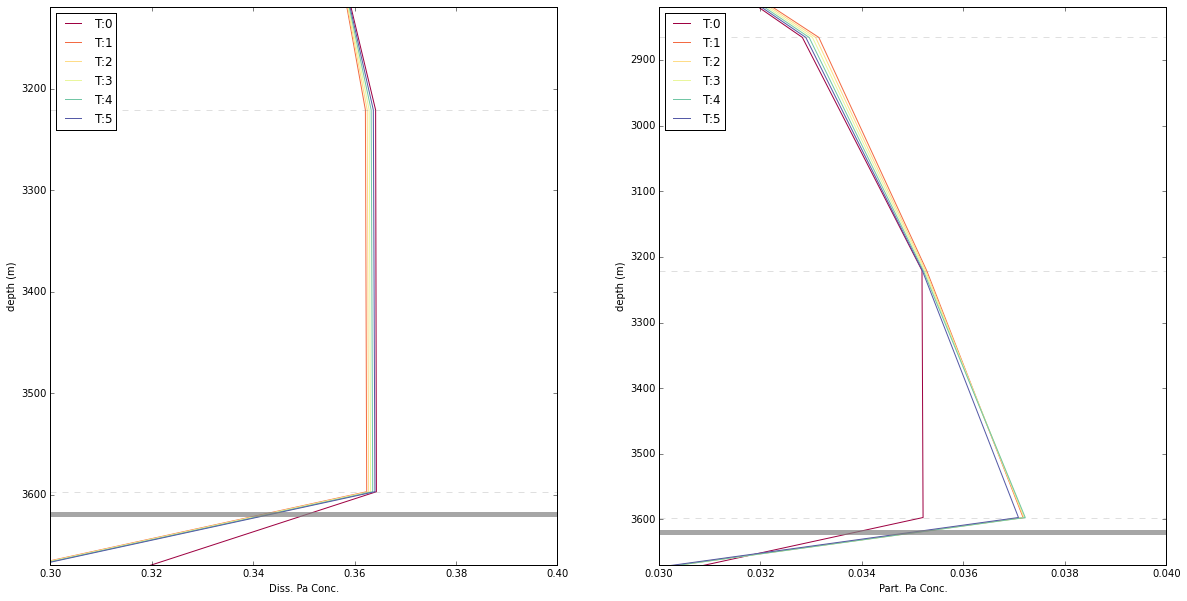

In [51]:
#zoom in
fig = plt.figure(figsize=(20,10))
plt.subplot(121)
vetical(TR_7,dep,'Diss. Pa','True',yup=-500,ydown=50)
plt.gca().invert_yaxis();plt.xlim([0.3,0.4])

plt.subplot(122)
vetical(TR_9,dep,'Part. Pa','True',yup=-800,ydown=50)
plt.gca().invert_yaxis();plt.xlim([0.03,0.04])
plt.show()

** The codes are doing the right things. However, If we plots the figure in top view, we will see discontinuity around the edges.**


### Plot horizontally
* diss. Pa

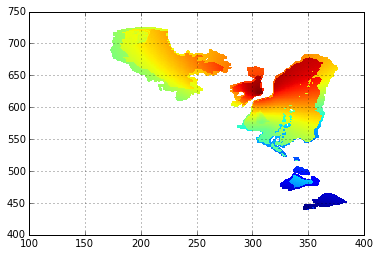

In [76]:
TR_7=np.ma.masked_where(TR_7<=0, TR_7)
plt.pcolor(TR_7[-1,43,:,:])
plt.grid();plt.xlim([100,400]);plt.ylim([400,750]);

* part. Th

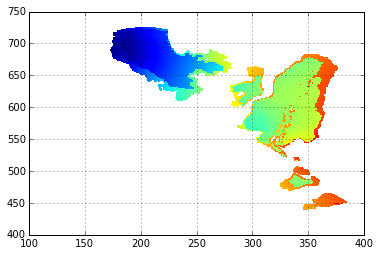

In [72]:
TR_10=np.ma.masked_where(TR_10<=0, TR_10)
plt.pcolor(TR_10[-1,43,:,:])
plt.grid();plt.xlim([150,400]);plt.ylim([400,750]);